# Tarea #2: Los buenos ejemplos se copian

Para esta tarea trataremos de reproducir dos visualizaciones del The Economist. Para ellos nos enfocaremos en imitar la paleta de colores que ocuparon, las visualizaciones y las anotaciones que incluyen en los gráficos, además de todos los otros detalles de título, subtítulo, etcétera.

## Problema 1: Behavioural finance

In [1]:
from IPython.display import Image

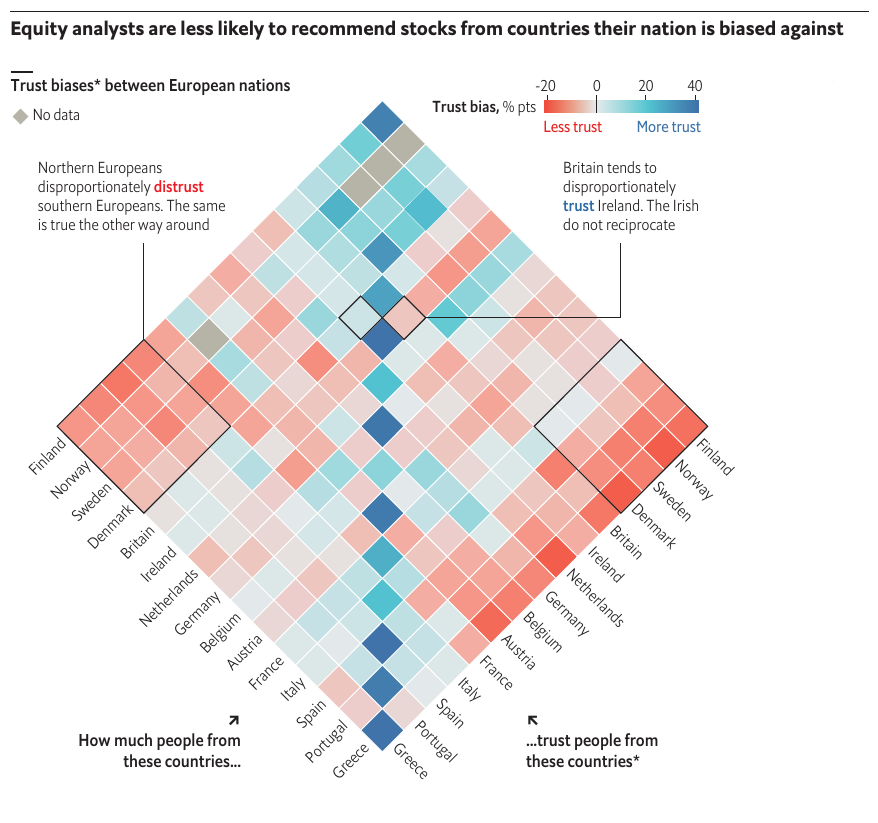

In [2]:
Image("./images/01-behavioural-finance.png")

### Datos

Los datos fueron sacados de [este paper](https://papers.ssrn.com/sol3/papers.cfm?abstract_id=3153900) (Table IA.I). Como la idea de esta tarea no es enfocarse en la extracción de datos, el archivo `csv` con los datos de la tabla ya son entregados en `data/01-behavioural-finance.csv`

### Ayuda 1

[Esta herramienta](https://eltos.github.io/gradient/) puede ser sumamente útil para extraer la paleta de colores y crear un colormap con esos valores. Una vez que se han elegido los colores, la paleta puede ser cargada de la siguiente forma

In [4]:
from matplotlib.colors import LinearSegmentedColormap

my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    (0.000, (1.000, 0.357, 0.298)),
    (0.333, (1.000, 1.000, 1.000)),
    (0.666, (0.024, 0.671, 0.820)),
    (1.000, (0.208, 0.349, 0.416))))

### Ayuda 2

Una de las partes más difíciles de esta tarea puede ser rotar el gráfico. Como la idea de la tarea es ejercitar otro tipo de habilidades, aquí se entrega una función que permitirá rotar el gráfico.

In [ ]:
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes

In [ ]:
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df.shape[0],0, df.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

Abajo se da un ejemplo de cómo utilizar la función dado un dataframe `df`. De ahí en adelante, el axis que se modifica es `ax0`.

In [ ]:
# Para que esta celda pueda correr hay que definir df, crear el colormap my_gradient e importar sns

fig, ax = plt.subplots(1,1, figsize=(10, 8))

ax0 = rotate_axes(fig, 111,45)

sns.heatmap(df, cmap=my_gradient, ax=ax0)
ax.set_axis_off()

plt.show()

### Código problema 1: Behavioural finance

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.transforms import Affine2D
from matplotlib.collections import PathCollection
from mpl_toolkits.axisartist.grid_finder import DictFormatter
import mpl_toolkits.axisartist.floating_axes as floating_axes
from flexitext import flexitext
from matplotlib import lines
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.patches import Rectangle
from matplotlib.patches import Arrow
from matplotlib.patches import Circle
from matplotlib import patches
from matplotlib.collections import LineCollection

In [3]:
df_trust = pd.read_csv("data/01-behavioural-finance.csv")

In [4]:
df_trust.shape

(15, 16)

In [5]:
df_trust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Origin of trust  15 non-null     object 
 1   Aus              14 non-null     float64
 2   Bel              15 non-null     float64
 3   Den              15 non-null     float64
 4   Fin              14 non-null     float64
 5   Fra              15 non-null     float64
 6   Ger              15 non-null     float64
 7   Gre              15 non-null     float64
 8   Ire              15 non-null     float64
 9   Ita              15 non-null     float64
 10  NL               15 non-null     float64
 11  Nor              14 non-null     float64
 12  Por              15 non-null     float64
 13  Spa              15 non-null     float64
 14  Swe              14 non-null     float64
 15  UK               15 non-null     float64
dtypes: float64(15), object(1)
memory usage: 2.0+ KB


In [6]:
df_trust.head(15)

,Origin of trust,Aus,Bel,Den,Fin,Fra,Ger,Gre,Ire,Ita,NL,Nor,Por,Spa,Swe,UK
0,Aus,0.38,-0.00,-0.06,-0.04,-0.05,0.10,-0.02,-0.06,-0.01,-0.04,-0.04,-0.03,-0.04,-0.01,-0.08
1,Bel,-0.03,0.12,-0.02,-0.04,0.02,-0.03,-0.00,-0.01,0.02,-0.03,-0.06,0.01,-0.01,-0.04,-0.04
2,Den,0.05,-0.04,0.31,0.04,-0.08,-0.03,-0.05,0.02,-0.04,0.10,0.22,-0.04,-0.06,0.15,0.05
3,Fin,0.05,-0.04,0.06,0.36,-0.08,-0.07,-0.10,-0.05,-0.12,-0.03,0.16,-0.12,-0.14,0.09,0.03
4,Fra,-0.07,0.04,-0.01,-0.03,0.25,0.06,0.01,0.01,0.05,-0.02,-0.03,0.04,0.04,-0.01,-0.05
5,Ger,0.09,-0.03,0.01,-0.02,0.06,0.39,-0.02,-0.05,-0.00,0.00,-0.01,-0.04,-0.02,0.03,-0.07
6,Gre,-0.16,-0.13,-0.18,-0.15,-0.07,-0.12,0.42,-0.07,0.01,-0.18,-0.18,-0.02,-0.00,-0.13,-0.14
7,Ire,-0.06,-0.04,-0.07,-0.08,-0.01,-0.05,0.01,0.41,0.06,-0.06,-0.09,0.01,-0.01,-0.10,-0.04
8,Ita,-0.04,-0.03,-0.00,0.00,0.06,0.10,0.01,0.01,0.21,0.01,-0.03,0.00,0.03,-0.00,0.03
9,NL,-0.06,0.03,0.18,0.08,-0.09,-0.02,-0.05,0.01,-0.03,0.21,0.10,-0.01,-0.02,0.12,0.01


In [7]:
df_trust_sort =  df_trust.reindex([6,11,12,8,4,0,1,5,9,7,14,2,13,10,3])
df_trust_sort_2 = df_trust_sort[['Origin of trust','Gre','Por','Spa','Ita','Fra','Aus','Bel','Ger',
                                 'NL','Ire','UK','Den','Swe','Nor','Fin']]
df_trust_sort_2

,Origin of trust,Gre,Por,Spa,Ita,Fra,Aus,Bel,Ger,NL,Ire,UK,Den,Swe,Nor,Fin
6,Gre,0.42,-0.02,-0.00,0.01,-0.07,-0.16,-0.13,-0.12,-0.18,-0.07,-0.14,-0.18,-0.13,-0.18,-0.15
11,Por,-0.03,0.37,0.04,0.04,0.01,-0.10,-0.08,-0.06,-0.10,-0.06,-0.05,-0.11,-0.13,-0.13,-0.11
12,Spa,-0.04,0.04,0.41,0.05,-0.07,-0.08,-0.07,0.01,-0.05,-0.04,-0.13,-0.07,-0.04,-0.05,-0.08
8,Ita,0.01,0.00,0.03,0.21,0.06,-0.04,-0.03,0.10,0.01,0.01,0.03,-0.00,-0.00,-0.03,0.00
4,Fra,0.01,0.04,0.04,0.05,0.25,-0.07,0.04,0.06,-0.02,0.01,-0.05,-0.01,-0.01,-0.03,-0.03
0,Aus,-0.02,-0.03,-0.04,-0.01,-0.05,0.38,-0.00,0.10,-0.04,-0.06,-0.08,-0.06,-0.01,-0.04,-0.04
1,Bel,-0.00,0.01,-0.01,0.02,0.02,-0.03,0.12,-0.03,-0.03,-0.01,-0.04,-0.02,-0.04,-0.06,-0.04
5,Ger,-0.02,-0.04,-0.02,-0.00,0.06,0.09,-0.03,0.39,0.00,-0.05,-0.07,0.01,0.03,-0.01,-0.02
9,NL,-0.05,-0.01,-0.02,-0.03,-0.09,-0.06,0.03,-0.02,0.21,0.01,0.01,0.18,0.12,0.10,0.08
7,Ire,0.01,0.01,-0.01,0.06,-0.01,-0.06,-0.04,-0.05,-0.06,0.41,-0.04,-0.07,-0.10,-0.09,-0.08


In [8]:
df_map = df_trust_sort_2.drop(columns='Origin of trust')

In [9]:
df_map[df_map.select_dtypes(include=['number']).columns] *= 100

In [10]:
df_map

,Gre,Por,Spa,Ita,Fra,Aus,Bel,Ger,NL,Ire,UK,Den,Swe,Nor,Fin
6,42.0,-2.0,-0.0,1.0,-7.0,-16.0,-13.0,-12.0,-18.0,-7.0,-14.0,-18.0,-13.0,-18.0,-15.0
11,-3.0,37.0,4.0,4.0,1.0,-10.0,-8.0,-6.0,-10.0,-6.0,-5.0,-11.0,-13.0,-13.0,-11.0
12,-4.0,4.0,41.0,5.0,-7.0,-8.0,-7.0,1.0,-5.0,-4.0,-13.0,-7.0,-4.0,-5.0,-8.0
8,1.0,0.0,3.0,21.0,6.0,-4.0,-3.0,10.0,1.0,1.0,3.0,-0.0,-0.0,-3.0,0.0
4,1.0,4.0,4.0,5.0,25.0,-7.0,4.0,6.0,-2.0,1.0,-5.0,-1.0,-1.0,-3.0,-3.0
0,-2.0,-3.0,-4.0,-1.0,-5.0,38.0,-0.0,10.0,-4.0,-6.0,-8.0,-6.0,-1.0,-4.0,-4.0
1,-0.0,1.0,-1.0,2.0,2.0,-3.0,12.0,-3.0,-3.0,-1.0,-4.0,-2.0,-4.0,-6.0,-4.0
5,-2.0,-4.0,-2.0,-0.0,6.0,9.0,-3.0,39.0,0.0,-5.0,-7.0,1.0,3.0,-1.0,-2.0
9,-5.0,-1.0,-2.0,-3.0,-9.0,-6.0,3.0,-2.0,21.0,1.0,1.0,18.0,12.0,10.0,8.0
7,1.0,1.0,-1.0,6.0,-1.0,-6.0,-4.0,-5.0,-6.0,41.0,-4.0,-7.0,-10.0,-9.0,-8.0


In [11]:
def rotate_axes(fig, rect, angle):
    tr = Affine2D().scale(1, 1).rotate_deg(angle)

    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(0, df_map.shape[0],0, df_map.shape[0]))

    ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)

    fig.add_subplot(ax1) 
    ax1.axis[:].set_visible(False)
    aux_ax = ax1.get_aux_axes(tr)
    return aux_ax

In [12]:
my_gradient = LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:F04D3D-33:E4E7E9-66:57C6D1-100:3F73A9
    (0.000, (0.941, 0.302, 0.239)),
    (0.330, (0.894, 0.906, 0.914)),
    (0.660, (0.341, 0.776, 0.820)),
    (1.000, (0.247, 0.451, 0.663))))

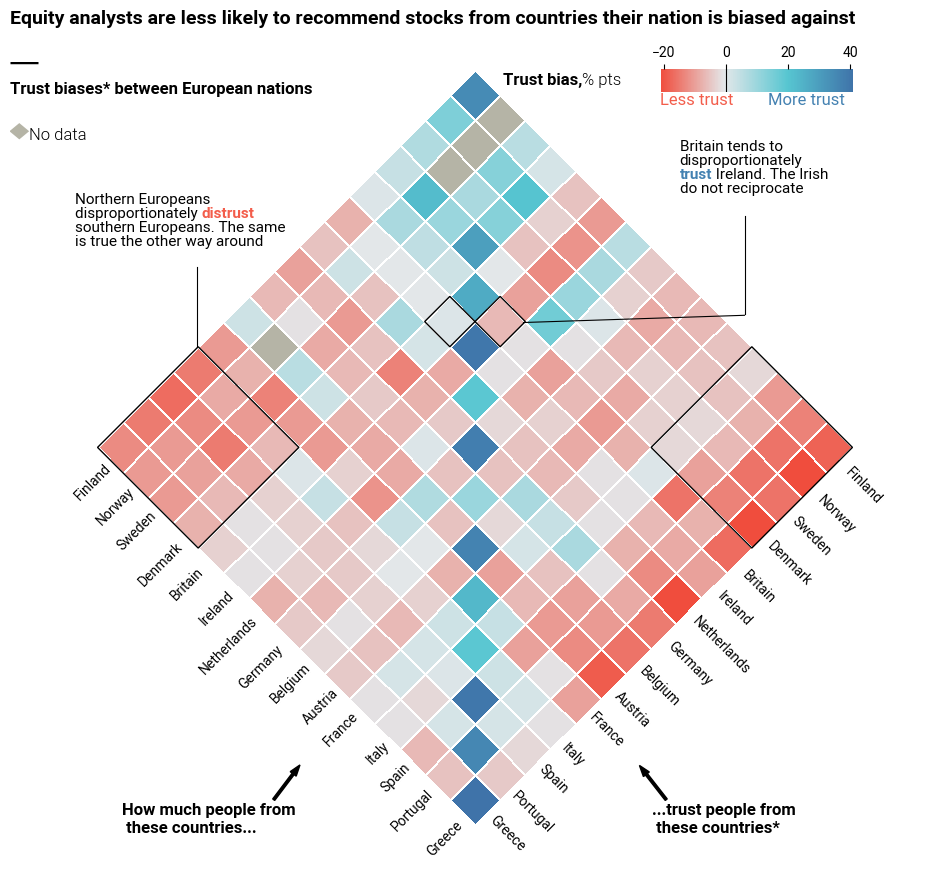

In [14]:
# Ejecutar esta celda dos veces para que muestre el fondo gris

fig, ax = plt.subplots(1,1, figsize=(12, 10))
plt.rcParams["font.family"] = "Roboto"
ax0 = rotate_axes(fig, 111, 45)

plt.rcParams['axes.facecolor'] = '#b5b4a6'
sns.heatmap(df_map, cmap=my_gradient, ax=ax0, linewidth=0.5, cbar = False)

plt.text(-1.2, -0.9, 'Greece', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-2.2, -0.2, 'Portugal', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-2.5, 0.9, 'Spain', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-2.9, 1.7, 'Italy', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-4.1, 2.2, 'France', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-4.7, 2.8, 'Austria', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-5.6, 3.4, 'Belgium', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-6.5, 3.8, 'Germany', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-7.6, 4.2, 'Netherlands', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-7.6, 5.6, 'Ireland', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-8.4, 6.3, 'Britain', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-9.3, 6.7, 'Denmark', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-9.9, 7.7, 'Sweden', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-10.5, 8.4, 'Norway', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(-11.1, 9.1, 'Finland', color = 'black', rotation = 45, rotation_mode = 'anchor', transform_rotates_text = True)

plt.text(0.4, 0.1, 'Greece', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(1, 0.8, 'Portugal', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(1.8, 1.55, 'Spain', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(2.4, 2.15, 'Italy', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(3.2, 3, 'France', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(3.9, 3.6, 'Austria', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(4.6, 4.3, 'Belgium', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(5.4, 5, 'Germany', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(6.1, 5.7, 'Netherlands', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(6.8, 6.4, 'Ireland', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(7.5, 7, 'Britain', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(8.2, 7.8, 'Denmark', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(8.9, 8.5, 'Sweden', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(9.6, 9.1, 'Norway', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)
plt.text(10.4, 9.9, 'Finland', color = 'black', rotation = 315, rotation_mode = 'anchor', transform_rotates_text = True)


ax0.add_patch(Rectangle((11, 0), 4, 4, fill=None, alpha=1))
ax0.add_patch(Rectangle((0, 11), 4, 4, fill=None, alpha=1))
ax0.add_patch(Rectangle((10, 9), 1, 1, fill=None, alpha=1))
ax0.add_patch(Rectangle((9, 10), 1, 1, fill=None, alpha=1))

ax.set_axis_off()

cax = inset_axes(ax0, width="25%", height="3%", loc='upper right')

cbar = fig.colorbar(mpl.cm.ScalarMappable(norm=mpl.colors.Normalize(-21, 41), cmap= my_gradient),
             cax=cax, location = 'top', shrink=0.2)

cbar.outline.set_visible(False)

ax.text(0, 1.05, "Equity analysts are less likely to recommend stocks from countries their nation is biased against", 
        fontsize=14, fontweight=600, ha='left')

text = "<size:12><weight:bold>Trust biases* between European nations</></>"
flexitext(0, 0.975, text, va="top", ax=ax)

ax.text(0.0205,0.9, 'No data', fontsize=12, fontweight=300)

ax.add_patch(Rectangle((0.01, 0.9), 0.015, 0.015, facecolor='#b5b4a6', fill=True, alpha=1, angle=45))

text2 = "<size:11>Northern Europeans\ndisproportionately <weight:bold><color:#f35d4b>distrust</></>\nsouthern Europeans. The same\nis true the other way around</>"
flexitext(0.07, 0.83, text2, va="top", ax=ax)

ax.axvline(0.201, 0.6, 0.734, color = 'black', linewidth=0.8)
ax.axvline(0.79, 0.673, 0.8, color = 'black', linewidth=0.8)

ax0.axhline(19.4, 0.563, 0.85, color = 'black', linewidth=0.8 )

cax.axvline(0.2, 0, 1, color = 'black', linewidth=0.8)

text3 = "<size:11>Britain tends to\ndisproportionately\n<weight:bold><color:#4381b1>trust</></> Ireland. The Irish\ndo not reciprocate</>"
flexitext(0.72, 0.9, text3, va="top", ax=ax)

ax.text(0.53,0.971, 'Trust bias,', fontsize=12, fontweight=600)
ax.text(0.615,0.971, '% pts', fontsize=12, fontweight=300)

text4 = "<size:12><color:#4381b1>More trust</></>"
flexitext(0.815, 0.96, text4, va="top", ax=ax)

text5 = "<size:12><color:#f35d4b>Less trust</></>"
flexitext(0.699, 0.96, text5, va="top", ax=ax)

ax0.arrow(-3.5,4.5,0.9,0.125,width=0.07, facecolor='black')

ax0.arrow(4.3,-3.3,0.11,0.9,width=0.07, facecolor='black')

ax.text(0.12,0, 'How much people from\n these countries...', fontsize=12, fontweight=600)
ax.text(0.69,0, '...trust people from\n these countries*', fontsize=12, fontweight=600)
ax.add_artist(
    lines.Line2D(
        [0, 0.03], [1, 1], lw=2.5, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)



plt.show()

## Problema 2: Happiness economics

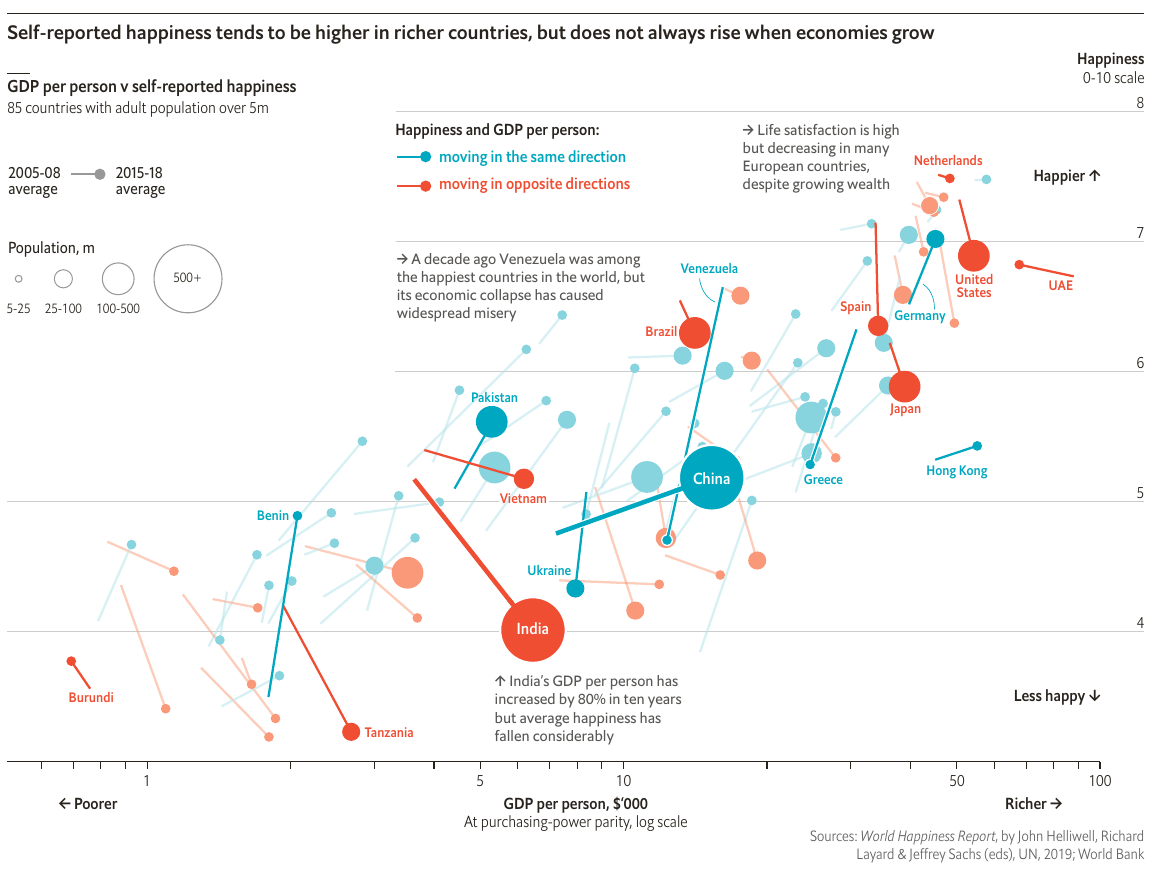

In [18]:
Image("./images/02-happiness-economics.png")

### Datos

El equipo del The Economist publicaron su código para la extracción y procesamiento de datos en [su GitHub](https://github.com/TheEconomist/graphic-detail-data/tree/master/data/2019-03-23_happiness-economics). De hecho, el código para hacer el gráfico también está incluido, pero -lamentablemente para ustedes- usan R en vez de Python. Los datos ya han sido bajados y compilados, los cuales se ubican en `data/02-happiness-economics.csv`

### Ayuda 1

Si se dan cuenta, hay datos para un total de 125 países en el archivo `csv`, pero en el gráfico solo hay 85. Si se fijan bien en [la metodologia publicada](https://github.com/TheEconomist/graphic-detail-data/blob/master/data/2019-03-23_happiness-economics/README.Rmd#L160), el The Economist selecciona los países con una población de más de 5 millones de personas en el año 2018 para graficarlos (de ahí que sean menos).

### Ayuda 2

El color de cada círculo está relacionado al valor de la columna `paradox`.

### Código problema 2: Happiness economics

In [15]:
df_happy = pd.read_csv("data/02-happiness-economics.csv")

In [16]:
df_happy.shape

(250, 12)

In [17]:
df_happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  250 non-null    int64  
 1   name        250 non-null    object 
 2   iso2c       248 non-null    object 
 3   happy       250 non-null    float64
 4   gdp.pc      250 non-null    float64
 5   pop         250 non-null    float64
 6   obs         250 non-null    int64  
 7   year        250 non-null    int64  
 8   quadrant    250 non-null    object 
 9   paradox     250 non-null    bool   
 10  pop.break   250 non-null    object 
 11  pop.levels  250 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 21.9+ KB


In [18]:
df_happy.head()

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
0,1,Afghanistan,AF,3.723590,1298.143187,1.324255e+07,1,2008,rise-fall,True,<25m,1
1,2,Albania,AL,4.634252,8754.565278,2.269081e+06,1,2008,rise-rise,False,<25m,1
2,3,Argentina,AR,6.115706,17643.280656,2.932879e+07,3,2008,rise-fall,True,25m-100m,2
3,4,Armenia,AM,4.607600,6893.071401,2.384185e+06,3,2008,rise-rise,False,<25m,1
4,5,Australia,AU,7.293279,40313.264414,1.670645e+07,3,2008,rise-fall,True,<25m,1


In [19]:
df_happy_filter = df_happy[(df_happy["year"] == 2018) & (df_happy['pop'] > 5000000)]

In [20]:
df_happy_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 85 entries, 125 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  85 non-null     int64  
 1   name        85 non-null     object 
 2   iso2c       85 non-null     object 
 3   happy       85 non-null     float64
 4   gdp.pc      85 non-null     float64
 5   pop         85 non-null     float64
 6   obs         85 non-null     int64  
 7   year        85 non-null     int64  
 8   quadrant    85 non-null     object 
 9   paradox     85 non-null     bool   
 10  pop.break   85 non-null     object 
 11  pop.levels  85 non-null     int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 8.1+ KB


In [21]:
df_happy_filter.head()

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
125,126,Afghanistan,AF,3.067623,1800.812448,19748721.00,4,2018,rise-fall,True,<25m,1
127,128,Argentina,AR,6.013036,18486.856968,33404942.00,4,2018,rise-fall,True,25m-100m,2
129,130,Australia,AU,7.215276,44934.613655,20037789.50,4,2018,rise-fall,True,<25m,1
130,131,Austria,AT,7.283451,45602.021578,7538082.75,4,2018,rise-rise,False,<25m,1
131,132,Azerbaijan,AZ,5.198041,15943.565790,7445806.75,4,2018,rise-rise,False,<25m,1


In [22]:
df_happy_filter['pop.break'].value_counts()

pop.break
<25m         53
25m-100m     22
100m-500m     8
500m+         2
Name: count, dtype: int64

In [23]:
df_happy_filter['gdp.pc'] = df_happy_filter['gdp.pc'].div(1000)

/tmp/ipykernel_27696/537989127.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy_filter['gdp.pc'] = df_happy_filter['gdp.pc'].div(1000)


In [24]:
df_happy_filter['pop.break'] = df_happy_filter['pop.break'].str.replace("<25m","5")
df_happy_filter['pop.break'] = df_happy_filter['pop.break'].str.replace("25m-100m","25")
df_happy_filter['pop.break'] = df_happy_filter['pop.break'].str.replace("100m-500m","100")
df_happy_filter['pop.break'] = df_happy_filter['pop.break'].str.replace("500m+","500")

/tmp/ipykernel_27696/4186423559.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy_filter['pop.break'] = df_happy_filter['pop.break'].str.replace("<25m","5")
/tmp/ipykernel_27696/4186423559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy_filter['pop.break'] = df_happy_filter['pop.break'].str.replace("25m-100m","25")
/tmp/ipykernel_27696/4186423559.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] =

In [25]:
df_happy_filter['pop.break'] = pd.to_numeric(df_happy_filter['pop.break'], errors='coerce')

/tmp/ipykernel_27696/2449548218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_happy_filter['pop.break'] = pd.to_numeric(df_happy_filter['pop.break'], errors='coerce')


In [26]:
df_happy_filter.head()

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
125,126,Afghanistan,AF,3.067623,1.800812,19748721.00,4,2018,rise-fall,True,5,1
127,128,Argentina,AR,6.013036,18.486857,33404942.00,4,2018,rise-fall,True,25,2
129,130,Australia,AU,7.215276,44.934614,20037789.50,4,2018,rise-fall,True,5,1
130,131,Austria,AT,7.283451,45.602022,7538082.75,4,2018,rise-rise,False,5,1
131,132,Azerbaijan,AZ,5.198041,15.943566,7445806.75,4,2018,rise-rise,False,5,1


In [27]:
#Agrega países que tienen más de 5 millones de habitantes en 2018, pero menos de dicho valor en 2008
df_filter_pop = df_happy[(df_happy['pop'] > 5000000) | (df_happy['pop'] == 4830573.5) | (df_happy['pop'] == 4548866) | (df_happy['pop'] == 4029725)
                | (df_happy['pop'] == 4475184) | (df_happy['pop'] == 4790639.66666667) | (df_happy['pop'] == 3883987)]
df_filter_pop

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
0,1,Afghanistan,AF,3.723590,1298.143187,1.324255e+07,1,2008,rise-fall,True,<25m,1
2,3,Argentina,AR,6.115706,17643.280656,2.932879e+07,3,2008,rise-fall,True,25m-100m,2
4,5,Australia,AU,7.293279,40313.264414,1.670645e+07,3,2008,rise-fall,True,<25m,1
5,6,Austria,AT,7.151583,43469.899671,7.008402e+06,2,2008,rise-rise,False,<25m,1
6,7,Azerbaijan,AZ,4.704407,12773.129907,6.455923e+06,3,2008,rise-rise,False,<25m,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Uzbekistan,UZ,6.181227,6302.945435,2.312906e+07,4,2018,rise-rise,False,<25m,1
246,247,Venezuela,VE,4.780798,11907.725888,2.180290e+07,4,2018,fall-fall,False,<25m,1
247,248,Vietnam,VN,5.207160,6264.942042,7.245191e+07,4,2018,rise-fall,True,25m-100m,2
248,249,Zambia,ZM,4.090824,3699.967200,9.632158e+06,4,2018,rise-fall,True,<25m,1


In [28]:
df_filter_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 170 entries, 0 to 249
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  170 non-null    int64  
 1   name        170 non-null    object 
 2   iso2c       170 non-null    object 
 3   happy       170 non-null    float64
 4   gdp.pc      170 non-null    float64
 5   pop         170 non-null    float64
 6   obs         170 non-null    int64  
 7   year        170 non-null    int64  
 8   quadrant    170 non-null    object 
 9   paradox     170 non-null    bool   
 10  pop.break   170 non-null    object 
 11  pop.levels  170 non-null    int64  
dtypes: bool(1), float64(3), int64(4), object(4)
memory usage: 16.1+ KB


In [29]:
df_filter_pop['gdp.pc'] = df_filter_pop['gdp.pc'].div(1000)

/tmp/ipykernel_27696/209149732.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter_pop['gdp.pc'] = df_filter_pop['gdp.pc'].div(1000)


In [30]:
df_filter_pop

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
0,1,Afghanistan,AF,3.723590,1.298143,1.324255e+07,1,2008,rise-fall,True,<25m,1
2,3,Argentina,AR,6.115706,17.643281,2.932879e+07,3,2008,rise-fall,True,25m-100m,2
4,5,Australia,AU,7.293279,40.313264,1.670645e+07,3,2008,rise-fall,True,<25m,1
5,6,Austria,AT,7.151583,43.469900,7.008402e+06,2,2008,rise-rise,False,<25m,1
6,7,Azerbaijan,AZ,4.704407,12.773130,6.455923e+06,3,2008,rise-rise,False,<25m,1
...,...,...,...,...,...,...,...,...,...,...,...,...
245,246,Uzbekistan,UZ,6.181227,6.302945,2.312906e+07,4,2018,rise-rise,False,<25m,1
246,247,Venezuela,VE,4.780798,11.907726,2.180290e+07,4,2018,fall-fall,False,<25m,1
247,248,Vietnam,VN,5.207160,6.264942,7.245191e+07,4,2018,rise-fall,True,25m-100m,2
248,249,Zambia,ZM,4.090824,3.699967,9.632158e+06,4,2018,rise-fall,True,<25m,1


In [31]:
#Países resaltados en el bubbleplot
main_countries = ['Brazil', 'Benin', 'Burundi', 'China', 'Germany','Greece', 'Hong Kong', 'India', 'Japan', 'Netherlands', 'Pakistan',
                  'Spain', 'Tanzania', 'Ukraine', 'United Arab Emirates', 'United States', 'Venezuela', 'Vietnam']

In [32]:
df_main = df_happy_filter.query('name in @main_countries')

In [33]:
df_others = df_happy_filter.query('name not in @main_countries')

In [34]:
df_main_full = df_filter_pop.query('name in @main_countries')

In [35]:
df_others_full = df_filter_pop.query('name not in @main_countries')

In [36]:
df_main

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
135,136,Benin,BJ,5.125048,2.083495,6.658832e+06,4,2018,rise-rise,False,5,1
139,140,Brazil,BR,6.272398,14.123418,1.636531e+08,4,2018,rise-fall,True,100,3
142,143,Burundi,BI,3.775283,0.693002,5.985708e+06,2,2018,fall-rise,True,5,1
149,150,China,CN,5.171721,15.540444,1.140639e+09,4,2018,rise-rise,False,500,4
164,165,Germany,DE,7.046204,45.290221,7.161500e+07,4,2018,rise-rise,False,25,2
166,167,Greece,GR,5.317360,24.764554,9.201199e+06,4,2018,fall-fall,False,5,1
170,171,Hong Kong,HK,5.430448,55.233910,6.498226e+06,2,2018,rise-rise,False,5,1
173,174,India,IN,3.965356,6.549701,9.850035e+08,4,2018,rise-fall,True,500,4
181,182,Japan,JP,5.863119,39.023101,1.112418e+08,4,2018,rise-fall,True,100,3
205,206,Netherlands,NL,7.481509,48.672578,1.439453e+07,4,2018,rise-fall,True,5,1


In [37]:
df_others

,Unnamed: 0,name,iso2c,happy,gdp.pc,pop,obs,year,quadrant,paradox,pop.break,pop.levels
125,126,Afghanistan,AF,3.067623,1.800812,19748721.00,4,2018,rise-fall,True,5,1
127,128,Argentina,AR,6.013036,18.486857,33404942.00,4,2018,rise-fall,True,25,2
129,130,Australia,AU,7.215276,44.934614,20037789.50,4,2018,rise-fall,True,5,1
130,131,Austria,AT,7.283451,45.602022,7538082.75,4,2018,rise-rise,False,5,1
131,132,Azerbaijan,AZ,5.198041,15.943566,7445806.75,4,2018,rise-rise,False,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,240,Uganda,UG,4.219302,1.713651,21388170.25,4,2018,rise-fall,True,5,1
242,243,United Kingdom,GB,7.098612,39.771899,54327669.75,4,2018,rise-rise,False,25,2
245,246,Uzbekistan,UZ,6.181227,6.302945,23129056.00,4,2018,rise-rise,False,5,1
248,249,Zambia,ZM,4.090824,3.699967,9632158.50,4,2018,rise-fall,True,5,1


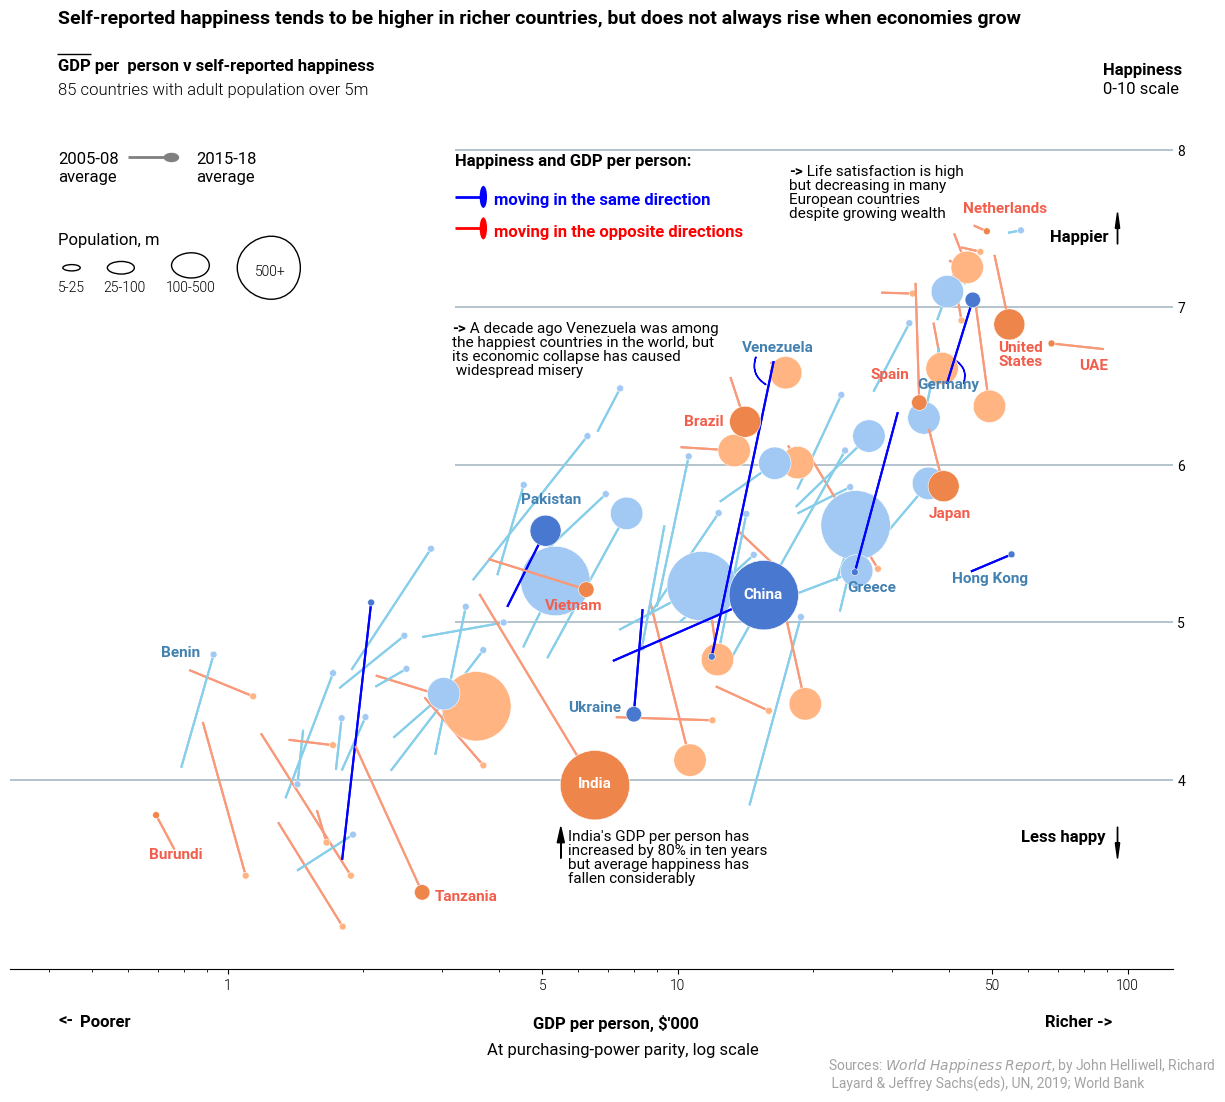

In [39]:
#Ejecutar celda dos veces para que el fondo sea blanco (sólo si se ejecutó el código para el gráfico N°1 previamente)

fig, ax = plt.subplots(1,1, figsize = (15,12)) 

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams["font.family"] = "Roboto"

ax.set_axisbelow(True)

ax.grid(axis = "y", color="#A8BAC4", lw=1.2)


ax.add_patch(Rectangle((0,4.5), 3.2, 3.9, facecolor='white', fill=True, alpha=1))


ax.text(0.42,8.8, "Self-reported happiness tends to be higher in richer countries, but does not always rise when economies grow", 
        fontsize=14, fontweight=600, ha='left')

ax.text(0.42,8.5, 'GDP per  person v self-reported happiness', fontsize=12, fontweight=600)

ax.text(0.42,8.35, '85 countries with adult population over 5m', fontsize=12, fontweight=300)

iso2c_select2 = df_others_full['iso2c']

for country in iso2c_select2:
    country_data = df_others_full[df_others_full['iso2c'] == country].sort_values('year')
    if(country_data["paradox"].iloc[0]):
        plt.plot(country_data['gdp.pc'], country_data['happy'], alpha=1, color="#f9997a", zorder = 1)
    else:
        plt.plot(country_data['gdp.pc'], country_data['happy'], alpha=1, color="skyblue", zorder = 1)

iso2c_select = df_main_full['iso2c']

for country in iso2c_select:
    country_data = df_main_full[df_main_full['iso2c'] == country].sort_values('year')
    if(country_data["paradox"].iloc[0]):
        plt.plot(country_data['gdp.pc'], country_data['happy'], alpha=1, color="#f9997a", zorder = 3)
    else:
        plt.plot(country_data['gdp.pc'], country_data['happy'], alpha=1, color="blue", zorder = 3)


sns.scatterplot(x="gdp.pc", y="happy", hue="paradox", size="pop.break",
            sizes=(25,2500), palette="pastel", data=df_others, ax=ax, alpha = 1, zorder  = 2)

sns.scatterplot(x="gdp.pc", y="happy", hue="paradox", size="pop.break",
            sizes=(25,2500), edgecolors='white', palette="muted", data=df_main, ax=ax, zorder  = 4)

plt.xscale("log")
ax.xaxis.set_ticks([1, 5, 10, 50, 100])
ax.xaxis.set_ticklabels([1, 5, 10, 50, 100], fontsize=10, fontweight=300)

ax.yaxis.set_ticks([i * 1 for i in range(4, 9)])
ax.yaxis.set_ticklabels([i * 1 for i in range(4, 9)])
ax.yaxis.set_tick_params(labelleft=False, length=0)


ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.xaxis.label.set_visible(False)
ax.yaxis.label.set_visible(False)
ax.legend().set_visible(False)

plt.tick_params(axis='y', which='both', labelleft=False, labelright=True)

# move label
plt.ylabel('Your label here', labelpad=-750, fontsize=14)

ax.arrow(5.5, 3.5, 0, 0.1, head_width=0.2, head_length=0.1, fc='k', ec='k', zorder = 5)

ax.arrow(95, 7.4, 0, 0.1, head_width=2.1, head_length=0.1, fc='k', ec='k', zorder = 5)

ax.arrow(95, 3.7, 0, -0.1, head_width=2.1, head_length=0.1, fc='k', ec='k', zorder = 5)

ax.text(0.42,7.8, '2005-08\naverage', fontsize=12, fontweight=400)

ax.add_patch(Circle((0.75,7.95), radius=0.03, facecolor='grey', fill=True, alpha=1))

ax.text(0.85,7.8, '2015-18\naverage', fontsize=12, fontweight=400)

ax.text(0.42,7.4, 'Population, m', fontsize=12, fontweight=400)

ax.add_patch(Circle((0.45,7.25), radius=0.02, fill=None, alpha=1))

ax.text(0.42,7.1, '5-25', fontsize=10, fontweight=300)

ax.add_patch(Circle((0.58,7.25), radius=0.04, fill=None, alpha=1))

ax.text(0.53,7.1, '25-100', fontsize=10, fontweight=300)

ax.add_patch(Circle((0.83,7.265), radius=0.08, fill=None, alpha=1))

ax.text(0.73,7.1, '100-500', fontsize=10, fontweight=300)

ax.add_patch(Circle((1.25,7.25), radius=0.2, fill=None, alpha=1))

ax.text(1.15,7.2, '500+', fontsize=10, fontweight=300)

ax.text(3.2,7.9, 'Happiness and GDP per person:', fontsize=12, fontweight=600)

text2 = "<size:12><weight:bold>Happiness</></>"
flexitext(0.94, 0.98, text2, va="top", ax=ax)

text3 = "<size:12>0-10 scale</>"
flexitext(0.94, 0.96, text3, va="top", ax=ax)

text4 = "<size:12><weight:bold>Happier</></>"
flexitext(0.895, 0.8, text4, va="top", ax=ax)

text5 = "<size:12><weight:bold>Less happy</></>"
flexitext(0.87, 0.15, text5, va="top", ax=ax)

text6 = "<size:12><weight:bold>Richer -></></>"
flexitext(0.89, -0.05, text6, va="top", ax=ax)

text7 = "<size:12><weight:bold>Poorer</></>"
flexitext(0.06, -0.05, text7, va="top", ax=ax)

text8 = "<size:12><weight:bold>GDP per person, $'000</></>"
flexitext(0.45, -0.05, text8, va="top", ax=ax)

text9 = "<size:12>At purchasing-power parity, log scale</>"
flexitext(0.41, -0.08, text9, va="top", ax=ax)

text10 = "<size:11><weight:bold><color:#f35d4b>Burundi</></></>"
flexitext(0.12, 0.131, text10, va="top", ax=ax)

text11 = "<size:11><weight:bold><color:#f35d4b>Tanzania</></></>"
flexitext(0.365, 0.085, text11, va="top", ax=ax)

text12 = "<size:11>India's GDP per person has\nincreased by 80% in ten years\nbut average happiness has\nfallen considerably</>"
flexitext(0.48, 0.15, text12, va="top", ax=ax)

ax.text(6, 3.95, 'India', fontsize=11, fontweight=600, zorder = 4,  color = 'white')

text13 = "<size:11><weight:bold><color:#4381b1>Benin</></></>"
flexitext(0.13, 0.35, text13, va="top", ax=ax)

text14 = "<size:11><weight:bold><color:#4381b1>Pakistan</></></>"
flexitext(0.44, 0.515, text14, va="top", ax=ax)

text15 = "<size:11><weight:bold><color:#f35d4b>Vietnam</></></>"
flexitext(0.46, 0.4, text15, va="top", ax=ax)

text16 = "<size:11><weight:bold><color:#4381b1>Ukraine</></></>"
flexitext(0.48, 0.29, text16, va="top", ax=ax)

text17 = "<size:11><weight:bold><color:#4381b1>Venezuela</></></>"
flexitext(0.63, 0.68, text17, va="top", ax=ax)

text18 = "<size:11><weight:bold><color:#f35d4b>Brazil</></></>"
flexitext(0.58, 0.6, text18, va="top", ax=ax)

ax.text(14, 5.15, 'China', fontsize=11, fontweight=600, zorder = 4,  color = 'white')

text19 = "<size:11><weight:bold>-></> A decade ago Venezuela was among\nthe happiest countries in the world, but\nits economic collapse has caused\n widespread misery</>"
flexitext(0.38, 0.7, text19, va="top", ax=ax)

text20 = "<size:11><weight:bold>-></> Life satisfaction is high\nbut decreasing in many\nEuropean countries\ndespite growing wealth</>"
flexitext(0.67, 0.87, text20, va="top", ax=ax)

text21 = "<size:11><weight:bold><color:#f35d4b>Netherlands</></></>"
flexitext(0.82, 0.83, text21, va="top", ax=ax)

text22 = "<size:11><weight:bold><color:#f35d4b>Spain</></></>"
flexitext(0.74, 0.65, text22, va="top", ax=ax)

text23 = "<size:11><weight:bold><color:#f35d4b>Japan</></></>"
flexitext(0.79, 0.5, text23, va="top", ax=ax)

text24 = "<size:11><weight:bold><color:#4381b1>Greece</></></>"
flexitext(0.72, 0.42, text24, va="top", ax=ax)

text25 = "<size:11><weight:bold><color:#4381b1>Hong Kong</></></>"
flexitext(0.81, 0.43, text25, va="top", ax=ax)

text26 = "<size:11><weight:bold><color:#f35d4b>United\nStates</></></>"
flexitext(0.85, 0.68, text26, va="top", ax=ax)

text27 = "<size:11><weight:bold><color:#f35d4b>UAE</></></>"
flexitext(0.92, 0.66, text27, va="top", ax=ax)

text28 = "<size:11><weight:bold><color:#4381b1>Germany</></></>"
flexitext(0.78, 0.64, text28, va="top", ax=ax)

ax.add_artist(
    lines.Line2D(
        [0.04,0.07], [0.99, 0.99], lw=1, color="black",
        solid_capstyle="butt", transform=ax.transAxes
    )
)

source = 'Sources: $World$ $Happiness$ $Report$, by John Helliwell, Richard\n Layard & Jeffrey Sachs(eds), UN, 2019; World Bank'
fig.text(
    0.67, 0.01, source, color="#a2a2a2", 
    fontsize=10, fontfamily="Roboto"
)


ax.add_artist(
        patches.FancyArrowPatch(
            (15.9, 6.5), (15, 6.7),
            arrowstyle = "Simple", 
            connectionstyle="arc3, rad=-0.45",
            color="b"
        )
    )

ax.add_artist(
        patches.FancyArrowPatch(
            (43, 6.5), (41, 6.67),
            arrowstyle = "Simple", 
            connectionstyle="arc3, rad=0.45",
            color="b"
        )
    )


ax.add_patch(Circle((3.7,7.7), radius=0.07, facecolor='blue', fill=True, alpha=1))

ax.add_patch(Circle((3.7,7.5), radius=0.07, facecolor='red', fill=True, alpha=1))

l1 = [(3.2, 7.7), (3.7, 7.7)]
l2 = [(3.2, 7.5), (3.7, 7.5)]
l3 = [(0.6, 7.95), (0.75, 7.95)]
lc = LineCollection([l1, l2, l3], color=["blue","red", "grey"], lw=2)

plt.gca().add_collection(lc)

ax.text(3.9,7.65, 'moving in the same direction', fontsize=12, color='b', fontweight=600)
ax.text(3.9,7.45, 'moving in the opposite directions', fontsize=12, color='r', fontweight=600)

ax.text(0.42, 2.45, '<-', fontsize=12, color='k', fontweight=600)

plt.show()